In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv or pd.excel)
# import torch
# from torch.utils.data import TensorDataset, DataLoader
# import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn import preprocessing # for label encoding of y

# Keras for Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional,Flatten # Layers 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Embedding
from sklearn.metrics import mean_squared_error

from tensorflow.keras.preprocessing import sequence # Padding our data so that batch training can speed up


In [25]:
flipkart = pd.read_excel('flipkart_4.xlsx')

In [26]:
import string
import nltk
from nltk import sent_tokenize # Splitting the sentence
from nltk.tokenize import word_tokenize #for splitting into words
from nltk.corpus import stopwords
import re
import tensorflow as tf


stop = stopwords.words('english')
wn = nltk.WordNetLemmatizer()

def desc_clean(desc):
    tokens_pr = "".join([char for char in desc if char not in string.punctuation])
    tokens = re.split('\W+', tokens_pr)
    words = " ".join([wn.lemmatize(w) for w in tokens if not w in stop])
    return words 

flipkart['desc_clean'] = flipkart['description'].apply(lambda x: desc_clean(str(x)))

In [27]:
flipkart['desc_clean']

0        Key Features Alisha Solid Womens Cycling Short...
1        FabHomeDecor Fabric Double Sofa Bed Finish Col...
2        Key Features AW Bellies Sandals Wedges Heel Ca...
3        Key Features Alisha Solid Womens Cycling Short...
4        Specifications Sicons All Purpose Arnica Dog S...
                               ...                        
19995    Buy WallDesign Small Vinyl Sticker Rs730 onlin...
19996    Buy Wallmantra Large Vinyl Stickers Sticker Rs...
19997    Buy Elite Collection Medium Acrylic Sticker Rs...
19998    Buy Elite Collection Medium Acrylic Sticker Rs...
19999    Buy Elite Collection Medium Acrylic Sticker Rs...
Name: desc_clean, Length: 20000, dtype: object

In [28]:
flipkart['desc_clean'] = flipkart['desc_clean'].apply(lambda x: x.replace('flipkartcom',''))
flipkart['desc_clean'] = flipkart['desc_clean'].apply(lambda x: x.replace('key feature',''))
flipkart['desc_clean'] = flipkart['desc_clean'].apply(lambda x: x.replace('online',''))
flipkart['desc_clean'] = flipkart['desc_clean'].apply(lambda x: x.replace('india',''))
flipkart['desc_clean'] = flipkart['desc_clean'].apply(lambda x: x.replace('product',''))
flipkart['desc_clean'] = flipkart['desc_clean'].apply(lambda x: x.replace('delivery',''))
flipkart['desc_clean'] = flipkart['desc_clean'].apply(lambda x: x.replace('replacement',''))
flipkart['desc_clean'] = flipkart['desc_clean'].apply(lambda x: x.replace('free',''))
flipkart['desc_clean'] = flipkart['desc_clean'].apply(lambda x: x.replace('shipping',''))
flipkart['desc_clean'] = flipkart['desc_clean'].apply(lambda x: x.replace('cash',''))
flipkart['desc_clean'] = flipkart['desc_clean'].apply(lambda x: x.replace('guarantee',''))
flipkart['desc_clean'] = flipkart['desc_clean'].apply(lambda x: x.replace('shop',''))

In [29]:
from sklearn.model_selection import train_test_split

X = flipkart['desc_clean']
y = flipkart['product_category']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16000,), (16000,), (4000,), (4000,))

In [85]:
# val_data = TensorDataset(torch.from_numpy(X_test_featcv), torch.from_numpy(test_labels))
# train_data = TensorDataset(torch.from_numpy(X_train_featcv),torch.from_numpy(train_labels))

# batch_size = 400

# train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
# val_loader = DataLoader(val_data, shuffle=True, batch_size=batch_size)


I tried working with pytorch but as of now I don't have much knowledge of it and it was getting confusing so I will try in future. So I will be working with keras LSTM and GRU.

In [31]:
label_encoder = preprocessing.LabelEncoder()

test_labels = label_encoder.fit_transform(y_test)
train_labels = label_encoder.fit_transform(y_train)
  
train_labels

array([3, 5, 0, ..., 0, 0, 3])

In [32]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [33]:
X_train

10189    Key Features Marc N Park Mens Printed Casual S...
7642     xy decor Cotton Sofa Cover white Pack 6 Price ...
5702     Flipkartcom Buy Zeva Keepz U On Combo Set  Rs ...
7709     Buy Generix OTG Sony Xperia M5 OTG Cable Rs 19...
7167     JDX Alloy Necklace Buy JDX Alloy Necklace Rs 2...
                               ...                        
8598     Buy Pepup PSRL820 Round Fixed Speed Ladder Rs1...
9432     Key Features AdroitZ Exclusive Barbie Doll Sun...
12873    Radiant Bay Ripples White Gold Diamond 14 K Ri...
16823    Blossom Berry Fabric Bracelet Price Rs 300 The...
2151     S4S Comfortable Womens Full Coverage Bra Price...
Name: desc_clean, Length: 16000, dtype: object

In [41]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer()
X_train_featcv = cv.fit_transform(X_train).toarray()


print(len(cv.vocabulary_))
print(cv.vocabulary_)

28703
{'key': 15361, 'features': 11840, 'marc': 16866, 'park': 19331, 'mens': 17184, 'printed': 20529, 'casual': 7499, 'shirt': 23596, 'slim': 24112, 'fit100': 12059, 'cottonfull': 8875, 'sleevespread': 24090, 'collarmarc': 8312, 'price': 20492, 'rs': 22092, '1119': 389, '100': 153, 'cotton': 8855, 'full': 12562, 'sleeve': 24066, 'black': 6360, 'colour': 8394, 'shirtspecifications': 23601, 'general': 12834, 'details': 9779, 'pattern': 19413, 'ideal': 14203, 'for': 12332, 'occasion': 18630, 'closure': 8120, 'buttons': 7162, 'number': 18549, 'contents': 8715, 'sales': 22841, 'package': 19145, 'pack': 19144, 'brand': 6840, 'fit': 12058, 'body': 6631, 'fabric': 11571, 'collar': 8304, 'spread': 24636, 'placket': 19917, 'button': 7153, 'down': 10270, 'hem': 13739, 'curved': 9265, 'care': 7396, 'machine': 16651, 'wash': 27699, 'warm': 27675, 'inside': 14588, 'out': 19002, 'with': 28138, 'like': 16180, 'use': 27006, 'only': 18804, 'not': 18485, 'chlorine': 7877, 'colors': 8374, 'bleach': 6415,

In [44]:
X_train_featcv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [45]:
X_test_featcv = cv.transform(X_test).toarray()

W have choose our parameters wisely.

Embedding layer have 3 parameters:

input_dim: This is the size of the vocabulary in the text data.For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.

embedding_vector_length : output dimension. I have test different values

input_length : length of document (each row)

In [46]:
desc_len = 250

X_train = sequence.pad_sequences(X_train_featcv, maxlen=desc_len)
X_test = sequence.pad_sequences(X_test_featcv, maxlen=desc_len)

In [115]:
embedding_vecor_length = 500
top_words = 28494

# I was getting already existing error so I added The code between model = Sequential()

import tensorflow as tf
from tensorflow.core.protobuf import rewriter_config_pb2
from tensorflow.keras.backend import set_session
tf.keras.backend.clear_session()  # For easy reset of notebook state.

config_proto = tf.ConfigProto()
off = rewriter_config_pb2.RewriterConfig.OFF
config_proto.graph_options.rewrite_options.arithmetic_optimization = off
session = tf.Session(config=config_proto)
set_session(session)

model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=desc_len))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='softmax'))
model.add(Dropout(0.2))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 500)          14247000  
_________________________________________________________________
lstm (LSTM)                  (None, 100)               240400    
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
Total params: 14,497,601
Trainable params: 14,497,601
Non-trainable params: 0
____________________________________________

In [116]:
history = model.fit(X_train, train_labels, validation_data=(X_test,test_labels), epochs=10, batch_size=64)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 152s 9ms/sample - loss: -8.9647 - acc: 0.1039 - val_loss: -20.4149 - val_acc: 0.0660
Epoch 2/10
16000/16000 [==============================] - 158s 10ms/sample - loss: -9.3621 - acc: 0.1017 - val_loss: -20.4149 - val_acc: 0.0660
Epoch 3/10
16000/16000 [==============================] - 149s 9ms/sample - loss: -8.8041 - acc: 0.1049 - val_loss: -20.4149 - val_acc: 0.0660
Epoch 4/10
16000/16000 [==============================] - 155s 10ms/sample - loss: -8.9274 - acc: 0.1037 - val_loss: -20.4149 - val_acc: 0.0660
Epoch 5/10
16000/16000 [==============================] - 154s 10ms/sample - loss: -8.7640 - acc: 0.1011 - val_loss: -20.4149 - val_acc: 0.0660
Epoch 6/10
16000/16000 [==============================] - 150s 9ms/sample - loss: -8.9619 - acc: 0.1029 - val_loss: -20.4149 - val_acc: 0.0660
Epoch 7/10
16000/16000 [==============================] - 149s 9ms/sample - loss: -9.7257 

In [118]:
model.evaluate(X_test,test_labels)

4000/4000 [==============================] - 9s 2ms/sample - loss: -20.4149 - acc: 0.0660


[-20.414918350219725, 0.066]

In [ ]:
Our model is not overfitting as it is not even performing well on training data.

Looking at val_acc and acc we can say that it maybe underfitting

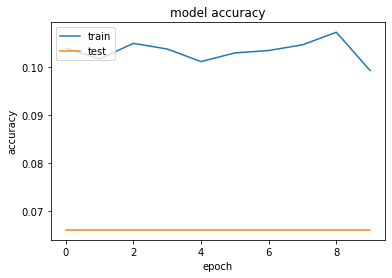

In [120]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Results are not good but we have something to start with

Now I will add flatten layer also and tune some parameters 

Also, I will just be running one epoch now as I am testing on how to improve our accuracy

I am not sure if changing our vectorization method would yield good results, so I will just try it later when I figure out how tune parameters to get much better accuracy.

In [121]:
config_proto = tf.ConfigProto()
off = rewriter_config_pb2.RewriterConfig.OFF
config_proto.graph_options.rewrite_options.arithmetic_optimization = off
session = tf.Session(config=config_proto)
set_session(session)

embedding_vecor_length = 1000
top_words = 28494

model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=desc_len))
model.add(LSTM(500))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='softmax'))
model.add(Dropout(0.2))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 1000)         28494000  
_________________________________________________________________
lstm_1 (LSTM)                (None, 500)               3002000   
_________________________________________________________________
dense_2 (Dense)              (None, 100)               50100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
_________________________________________________________________
dropout_3 (Dropout)          (None, 1)                 0         
Total params: 31,546,201
Trainable params: 31,546,201
Non-trainable params: 0
__________________________________________

In [122]:
history = model.fit(X_train, train_labels, validation_data=(X_test,test_labels), epochs=1, batch_size=64)

Train on 16000 samples, validate on 4000 samples
16000/16000 [==============================] - 1351s 84ms/sample - loss: -8.8773 - acc: 0.1047 - val_loss: -20.4149 - val_acc: 0.0660


In [123]:
model.evaluate(X_test,test_labels)

4000/4000 [==============================] - 117s 29ms/sample - loss: -20.4149 - acc: 0.0660


[-20.414918350219725, 0.066]

In [143]:
config_proto = tf.ConfigProto()
off = rewriter_config_pb2.RewriterConfig.OFF
config_proto.graph_options.rewrite_options.arithmetic_optimization = off
session = tf.Session(config=config_proto)
set_session(session)

embedding_vecor_length = 1000
top_words = 10000


model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=desc_len))
model.add(LSTM(100))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))
model.add(Dropout(0.5))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 250, 1000)         10000000  
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               440400    
_________________________________________________________________
flatten_8 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_17 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 101       
_________________________________________________________________
dropout_18 (Dropout)         (None, 1)               

In [144]:
history = model.fit(X_train, train_labels, validation_data=(X_test,test_labels), epochs=1, batch_size=64)

Train on 16000 samples, validate on 4000 samples
16000/16000 [==============================] - 227s 14ms/sample - loss: 7.6842 - acc: 0.1622 - val_loss: -20.4149 - val_acc: 0.0660


In [145]:
config_proto = tf.ConfigProto()
off = rewriter_config_pb2.RewriterConfig.OFF
config_proto.graph_options.rewrite_options.arithmetic_optimization = off
session = tf.Session(config=config_proto)
set_session(session)

embedding_vecor_length = 1000
top_words = 10000


model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=desc_len))
model.add(LSTM(100))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1, activation='softmax'))
model.add(Dropout(0.8))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 250, 1000)         10000000  
_________________________________________________________________
lstm_12 (LSTM)               (None, 100)               440400    
_________________________________________________________________
flatten_9 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_19 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 101       
_________________________________________________________________
dropout_20 (Dropout)         (None, 1)               

In [146]:
history = model.fit(X_train, train_labels, validation_data=(X_test,test_labels), epochs=1, batch_size=64)

Train on 16000 samples, validate on 4000 samples
16000/16000 [==============================] - 262s 16ms/sample - loss: 24.8286 - acc: 0.2255 - val_loss: -20.4149 - val_acc: 0.0660


In [147]:
config_proto = tf.ConfigProto()
off = rewriter_config_pb2.RewriterConfig.OFF
config_proto.graph_options.rewrite_options.arithmetic_optimization = off
session = tf.Session(config=config_proto)
set_session(session)

embedding_vecor_length = 1000
top_words = 10000


model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=desc_len))
model.add(LSTM(100))
model.add(Flatten())
model.add(Dropout(0.8))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1, activation='softmax'))
model.add(Dropout(0.8))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 250, 1000)         10000000  
_________________________________________________________________
lstm_13 (LSTM)               (None, 100)               440400    
_________________________________________________________________
flatten_10 (Flatten)         (None, 100)               0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_22 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)               

In [148]:
history = model.fit(X_train, train_labels, validation_data=(X_test,test_labels), epochs=1, batch_size=64)

Train on 16000 samples, validate on 4000 samples
16000/16000 [==============================] - 231s 14ms/sample - loss: 24.0526 - acc: 0.2265 - val_loss: -20.4149 - val_acc: 0.0660


In [22]:
from tensorflow.core.protobuf import rewriter_config_pb2
from tensorflow.keras.backend import set_session
tf.keras.backend.clear_session()  # For easy reset of notebook state.
config_proto = tf.ConfigProto()
off = rewriter_config_pb2.RewriterConfig.OFF
config_proto.graph_options.rewrite_options.arithmetic_optimization = off
session = tf.Session(config=config_proto)
set_session(session)

embedding_vecor_length = 1000
top_words = 10000


model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=desc_len))
model.add(LSTM(100))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(1, activation='softmax'))
model.add(Dropout(0.9))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 1000)         10000000  
_________________________________________________________________
lstm (LSTM)                  (None, 100)               440400    
_________________________________________________________________
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0

In [23]:
history = model.fit(X_train, train_labels, validation_data=(X_test,test_labels), epochs=1, batch_size=64)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 16000 samples, validate on 4000 samples
16000/16000 [==============================] - 172s 11ms/sample - loss: 29.6359 - acc: 0.2510 - val_loss: -20.6665 - val_acc: 0.0667


#### As you can see increasing dropout increases accuracy

In [39]:

from tensorflow.core.protobuf import rewriter_config_pb2
from tensorflow.keras.backend import set_session
tf.keras.backend.clear_session()  # For easy reset of notebook state.
config_proto = tf.ConfigProto()
off = rewriter_config_pb2.RewriterConfig.OFF
config_proto.graph_options.rewrite_options.arithmetic_optimization = off
session = tf.Session(config=config_proto)
set_session(session)

embedding_vecor_length = 1000
top_words = 10000


model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=desc_len))
model.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(5, 10)))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(1, activation='softmax'))
model.add(Dropout(0.9))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 1000)         10000000  
_________________________________________________________________
bidirectional (Bidirectional (None, 250, 200)          880800    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               240800    
_________________________________________________________________
dense (Dense)                (None, 100)               20100     
________________________________

In [47]:
history = model.fit(X_train, train_labels, validation_data=(X_test,test_labels), epochs=1, batch_size=64)

Train on 16000 samples, validate on 4000 samples
16000/16000 [==============================] - 469s 29ms/sample - loss: 30.3748 - acc: 0.2476 - val_loss: -19.9689 - val_acc: 0.0648


Now I can try:
1. Add More Features To The Input Samples (Bascially inceasing complexity of model)
2. Reduce Dropout

After experimenting with step 1 no improvement as shown

#### Although, after increasing dropout accuracy increased. I can't seem to find what does this mean though as dropout is used for dealing with overfitting 



In [62]:
from tensorflow.core.protobuf import rewriter_config_pb2
from tensorflow.keras.backend import set_session
tf.keras.backend.clear_session()  # For easy reset of notebook state.
config_proto = tf.ConfigProto()
off = rewriter_config_pb2.RewriterConfig.OFF
config_proto.graph_options.rewrite_options.arithmetic_optimization = off
session = tf.Session(config=config_proto)
set_session(session)
embedding_vecor_length = 32
top_words = 5000

model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=desc_len))
model.add(GRU(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 32)           160000    
_________________________________________________________________
gru (GRU)                    (None, 100)               39900     
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 210,101
Trainable params: 210,101
Non-trainable params: 0
_________________________________________________________________


In [64]:
history_gru = model.fit(X_train, train_labels, validation_data=(X_test,test_labels), epochs=10, batch_size=64)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 45s 3ms/sample - loss: -282.1840 - acc: 0.0647 - val_loss: -800.5172 - val_acc: 0.0648
Epoch 2/10
16000/16000 [==============================] - 44s 3ms/sample - loss: -1835.0638 - acc: 0.0637 - val_loss: -3089.6053 - val_acc: 0.0648
Epoch 3/10
16000/16000 [==============================] - 47s 3ms/sample - loss: -4869.0819 - acc: 0.0637 - val_loss: -6780.0846 - val_acc: 0.0648
Epoch 4/10
16000/16000 [==============================] - 43s 3ms/sample - loss: -9258.7385 - acc: 0.0637 - val_loss: -11778.5462 - val_acc: 0.0648
Epoch 5/10
16000/16000 [==============================] - 43s 3ms/sample - loss: -14912.6973 - acc: 0.0637 - val_loss: -17979.9948 - val_acc: 0.0648
Epoch 6/10
16000/16000 [==============================] - 43s 3ms/sample - loss: -21749.7402 - acc: 0.0637 - val_loss: -25296.7199 - val_acc: 0.0648
Epoch 7/10
16000/16000 [==============================] - 42s 3ms/

#### GRU performing just the same as LSTM

In [65]:
model.evaluate(X_test,test_labels)

4000/4000 [==============================] - 3s 841us/sample - loss: -64203.2159 - acc: 0.0648


[-64203.215890625, 0.06475]

#### I am not able to understand why we are getting such low accuracy with neural network ..?